# Lab Course Machine Learning
### Exercise Sheet 9
#### Prof. Dr. Dr. Lars Schmidt-Thieme, Hadi Samer Jomaa
Information Systems and Machine Learning Lab
#### University of Hildesheim
January 8th, 2018

Submission on January 15th, 2018 at 10:00 am, (on moodle, course code 3113)

### Instructions
Please read the lab related instructions, i.e. submission, report format and policies, at https://www.ismll.uni-hildesheim.de/lehre/prakAIML-16w/exercises/ml_lab_instructions.pdf

Datasets
1. Sparse dataset in libsvm format:
     - a9a D1 : https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/
2. UCI dataset:
    - SMS Spam D2 : https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
    - Spambase D3 : https://archive.ics.uci.edu/ml/datasets/Spambase

## Exercise 1: A spam filter using SVM(16 Points)

### Part A(8 Points)
  
  #### Objetive
  Build a basic spam filter using SVM and a pre-processed dataset. A spam filter classify an email to be Ham or Spam, using the content of an email as features. 

You have to use dataset D3 for this task, and to use libsvm https://github.com/cjlin1/libsvm/tree/master/python. libsvm accepts data in a libsvm format, and is given as:

 < label> < index1>:< value1> < index2>:< value2> ...

 - Convert dataset D3 into a libsvm format. 

Follow the readme document given on the libsvm link to see how you can use it to solve your problem 

- Learn a spam classifier on train part of the dataset and evaluate it on test dataset. 

- Optimize the hyper parameter i.e. value of C. 

[hint: when choosing the range of hyperparameter its always useful to check a diverse range i.e. C ={1,2,3,4} is not a good range to check for optimal value, you might want to check a broader range going from 0.1 to 100 etc.]. 

- Present your results in form of graphs and tables, listing details. 

You have to choose a quality criterion according to the given problem i.e. classification. 

[Note:] If you are not able to use libsvm you can replace it with scikit learn. But you have to convert your data into libsvm format.

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Ignore future warnings (appearance when using Cross_val_score)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Import dataset D3                  #Spam = 1/"Yes"
Nms = [ ' word_freq_make ' , ' word_freq_address ' , ' word_freq_all ' , ' word_freq_3d ' , ' word_freq_our ' , ' word_freq_over ' , ' word_freq_remove ' , ' word_freq_internet ' , ' word_freq_order ' , ' word_freq_mail ' , ' word_freq_receive ' , ' word_freq_will ' , ' word_freq_people ' , ' word_freq_report ' , ' word_freq_addresses:    continuous. ' , ' word_freq_free ' , ' word_freq_business ' , ' word_freq_email ' , ' word_freq_you ' , ' word_freq_credit ' , ' word_freq_your ' , ' word_freq_font ' , ' word_freq_000 ' , ' word_freq_money ' , ' word_freq_hp ' , ' word_freq_hpl ' , ' word_freq_george ' , ' word_freq_650 ' , ' word_freq_lab ' , ' word_freq_labs ' , ' word_freq_telnet ' , ' word_freq_857 ' , ' word_freq_data ' , ' word_freq_415 ' , ' word_freq_85 ' , ' word_freq_technology ' , ' word_freq_1999 ' , ' word_freq_parts ' , ' word_freq_pm ' , ' word_freq_direct ' , ' word_freq_cs ' , ' word_freq_meeting ' , ' word_freq_original ' , ' word_freq_project ' , ' word_freq_re ' , ' word_freq_edu ' , ' word_freq_table ' , ' word_freq_conference ' , ' char_freq_; ' , ' char_freq_( ' , ' char_freq_[ ' , ' char_freq_! ' , ' char_freq_$ ' , ' char_freq_# ' , ' capital_run_length_average ' , ' capital_run_length_longest ' , ' capital_run_length_total ','spam']
TXT =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",names= Nms)

#Showing the first 5 rows of the table. 
#The names of the columns indicate each considered word/char for the analysis

TXT.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
#Splitting the table into train and objetive data
txt = np.array(TXT)
X = txt[:,0:-1]
Y = txt[:,-1]
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.30)

### SVM model and hyperparameter optimization
Format libsvm is included within scikit library. 
Hyperparameter optimizaion:
    - Parameter "C", range (0.5 - 50) in increments of 0.5
    - Kernels: "linear" and "rbf"

In [38]:
#Training the SVM classifier with "linear" kernel

svm_ = svm.SVC('linear')

#The optimization of C will take values from 0.5 up to 50, with intervals of 0.5
C = np.arange(0.5,50.0,0.5).tolist()
parameters = {'C':C}

grid = GridSearchCV(svm_, parameters)
grid.fit(Xtr, Ytr)
results = pd.DataFrame(grid.cv_results_)
print("Best value: ",grid.best_estimator_.C)
print("Score: ",grid.best_score_)

Best value:  5.0
Score:  0.824223602484


In [39]:
#Training the SVM classifier with "rbf" kernel
svm_ = svm.SVC('rbf')

#The optimization of C will take values from 0.5 up to 50, with intervals of 0.5
C = np.arange(0.5,50.0,0.5).tolist()
parameters = {'C':C}

#Grid Search
grid2 = GridSearchCV(svm_, parameters)
grid2.fit(Xtr, Ytr)
results2 = pd.DataFrame(grid2.cv_results_)
print("Best value: ",grid2.best_estimator_.C)
print("Score: ",grid2.best_score_)

Best value:  5.0
Score:  0.824223602484


### Hyperparameter scores's plot
The plot of the results found for each kernel are showed bellow. In this case the data, both kernels "rbf" and "linear" delivered the same results (thus, it appears that there is only one line in the graph).

The best value of "C" is 5; it is observed that after that point, a higher value of C deliver a lower score

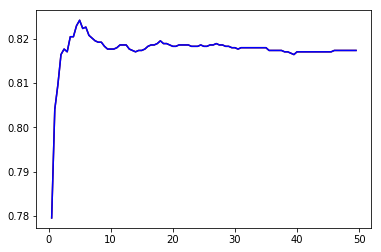

In [40]:
#Plotting of 
#Scores Bar Plot
plt.plot(C,results.iloc[:,2], "maroon")
plt.plot(C,results2.iloc[:,2], "blue")
plt.show()

### Quality criterion: Missclasification rate
In this case the quality criterion choosen is missclasification rate. Bellow are the showed both, the metod from scikit learn, and the "raw" implementation.

The best score obtained for test data is of 84.8%

In [45]:
#Calling the model using best hyperparameters found
svm_ = svm.SVC(kernel='rbf', C= 5)

#Fitting model into train data
svm_.fit(Xtr,Ytr)

#Evaluating model with test data
svm_.score(Xtst,Ytst)         

0.84793627805937721

In [56]:
#Using the model learned to make prediction on test data
Ŷ = svm_.predict(Xtst)

#Implementing the missclasification rate
def Acc(Y, ŷ):
    acc = 0
    for i in np.arange(len(Y)):
        if Y[i]==ŷ[i]:
            acc += 1
    return acc/len(Y)

Acc(Ytst,Ŷ)

0.8479362780593772

### Part B(8 Points) 
    Objetive: Pre-process a dataset and learn SVM 
The dataset D2 is not preprocessed. It consists of label[ham or spam] and content of sms text. 
    
   #### a) Pre-process this data into a processable format. 
  - Convert text data into features. 

You can look at scikit-learn text feature extraction utilities i.e. TFIDF or count. 
  - Get rid of the stop words i.e. "This", "the", "is", "a" etc, which appear in almost all the documents. 

#### b) After preprocessing you have to use SVM implementation provided by scikit-learn. 
- Use different hyperparameters and two kernels (linear and RBF). 
- Perform 5-fold cross validation and present the score using plots and tables. 
   
   You might also want to look at sklearn.pipeline.Pipeline utility to streamline your workflow.


### Text pre-processing

In [2]:
#Import Raw Data
Nmsr = ["Ham/Spm","Text"]
TXRaw =  pd.read_table("/home/salvatore/Downloads/SMSSpamCollection",sep="\t",names= Nmsr)

#Showing the first 5 rows of the table
TXRaw.head()

,Ham/Spm,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Transforming the objetive data, only the column of "spam" will be used at the end

Dummies = pd.get_dummies(TXRaw.iloc[:,0])
Dummies.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [4]:
#From previous table, storing the "Y" values to be used for modeling

Spam = np.array(Dummies.iloc[:,1])
Spam

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [5]:
#Building the "Corpus" to be processed; each row represent a document to pre-process

Text = TXRaw.iloc[:,1]
Text.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

#Calling the text-processer from scikit
vectorizer = CountVectorizer()

#Vectorizing all the "Corpus"
X = vectorizer.fit_transform(Text)

In [96]:
#Example of the Compressed Sparse Row format generated by the Scikit CountVectorizer
#It used libsvm libraries to build it

print(X[1])

  (0, 5567)	1
  (0, 8450)	1
  (0, 4342)	1
  (0, 4537)	1
  (0, 5538)	1


In [100]:
#Building the sparse matrix from the Compressed Sparse Row Format
#There are in total 8713 unique words used in the Corpus composed of 5572 rows/documens (in this case "SMS texts")

print("Shape",np.shape(XX))
XX = X.toarray()
XX

Shape (5572, 8713)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### SVM model and hyperparameter optimization
As in part A, the hyperparameter optimizaion is:
    - Parameter "C", range (0.5 - 50) in increments of 0.5
    - Kernels: "linear" and "rbf"

In [11]:
# Data Splitting 
Xtr, Xtst, Ytr, Ytst = train_test_split(XX, Spam, test_size=0.30)

In [12]:
svm_ = svm.SVC('linear')

C = np.arange(0.5,50.0,0.5).tolist()
parameters = {'C':C}

grid = GridSearchCV(svm_, parameters)
grid.fit(Xtr, Ytr)
results = pd.DataFrame(grid.cv_results_)
print("Best value: ",grid.best_estimator_.C)
print("Score: ",grid.best_score_)
#results.iloc[:,2:7]

Best value:  47.5
Score:  0.968974358974


In [13]:
svm_ = svm.SVC('rbf')

C = np.arange(0.5,50.0,0.5).tolist()
parameters = {'C':C}

grid2 = GridSearchCV(svm_, parameters)
grid2.fit(Xtr, Ytr)
results2 = pd.DataFrame(grid2.cv_results_)
print("Best value: ",grid2.best_estimator_.C)
print("Score: ",grid2.best_score_)
#results.iloc[:,2:7]

Best value:  47.5
Score:  0.968974358974


### Hyperparameter scores's plot
As in part A, both kernels "rbf" and "linear" delivered the same results, this is why in the plot appears that there is only one line.

The best value of "C" found is 47.5; it is observed that after that point, a higher value of C deliver a lower score.

     -Time-optimization for each Kernel was about 6 hours
     -Accuracy on test data: 96.88%

In [92]:
#Results (last 5 -"C" values) of hyperparameter optimization using "rbf" Kernel
results2.iloc[-5:,2:7]


,mean_test_score,mean_train_score,param_C,params,rank_test_score
94,0.968974,0.979359,47.5,{'C': 47.5},1
95,0.968974,0.979488,48,{'C': 48.0},1
96,0.968974,0.979616,48.5,{'C': 48.5},1
97,0.968718,0.979616,49,{'C': 49.0},4
98,0.968718,0.979744,49.5,{'C': 49.5},4


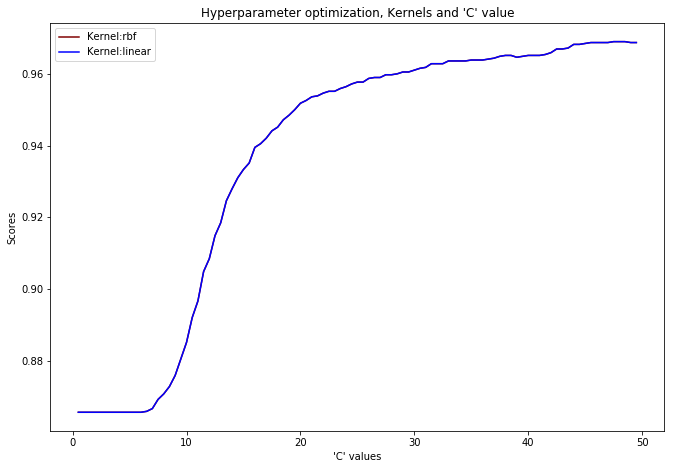

In [111]:
#Scores Bar Plot
plt.figure(figsize=(11,7.5))
plt.title("Hyperparameter optimization, Kernels and 'C' value")
plt.xlabel("'C' values")
plt.ylabel("Scores")
plt.plot(C,results.iloc[:,2], "maroon")
plt.plot(C,results2.iloc[:,2], "blue")
plt.legend(["Kernel:rbf ","Kernel:linear"])
plt.show()

In [18]:
svm_ = svm.SVC(kernel='rbf', C= 47.5)
svm_.fit(Xtr,Ytr)
Ŷ = svm_.predict(Xtst)
svm_.score(Xtst,Ytst) 

0.96889952153110048

### Word's Bag optimization

Althoug the score on test data was optimal, the time required optimize the hyperparameter C, took about 6 hours per kernel (trying 100 different values of C). This time is the result of the usage of the whole bag of words i.e. the complete vocabulary of the corpus (8713)

In order to optimize the time, a search for the "most significative" words for the classification of spam/ham was performed:

    - Generation of the whole bag of words
    - Generation of the frequencies of each word in Ham/Spam text
    - Selection criteria for the most representative words
    - Model generation
    - Results

In [140]:
#From the corpus, obtaining the "Bag" of words
Words = np.array(vectorizer.get_feature_names())

#Showing the bag of words
Words

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'],
      dtype='<U34')

In [8]:
"""Using the sparse matrix using and the function np.sum, the 
frequencies of each word over the entire Corpus was generated"""

Values = np.sum(XX,axis=0)

#Showing the frequencies of each word
Values

array([10, 29,  1, ...,  1,  1,  1], dtype=int64)

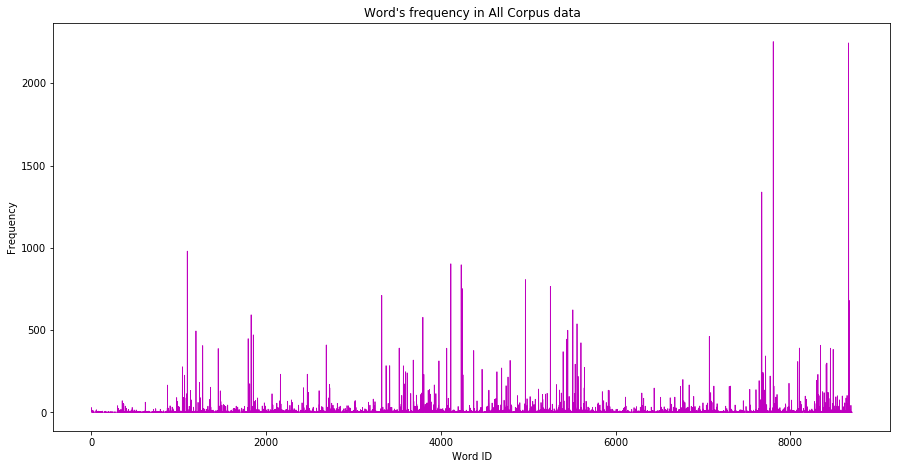

In [141]:
#Plot of the frequencies of each word
plt.figure(figsize=(15,7.5))
plt.title("Word's frequency in All Corpus data")
plt.xlabel("Word ID")
plt.ylabel("Frequency")
plt.plot(np.sum(XX,axis=0),'-m',linewidth=0.8)
plt.show()

In [143]:
#Example of words with more Frequency>300 in Corpus
n= 0
Bag2 = []
for v in Values:
    n+= 1
    if v>300:
        V = [Words[n],v]
        Bag2.append(V)
print(Bag2)

[['anderson', 980], ['area', 495], ['ate', 406], ['beach', 388], ['butt', 448], ['call09050000327', 593], ['canada', 471], ['dob', 410], ['force', 711], ['get4an18th', 391], ['gua', 318], ['havebeen', 578], ['howard', 313], ['iff', 390], ['in2', 903], ['isaiah', 897], ['italian', 752], ['justbeen', 376], ['ltd', 316], ['meal', 807], ['mycalls', 766], ['no1', 369], ['note', 445], ['now1', 499], ['ofcourse', 623], ['onam', 538], ['or2optout', 423], ['soc', 462], ['that2worzels', 586], ['the4th', 1339], ['thk', 343], ['toa', 2253], ['up4', 309], ['urawinner', 391], ['weak', 408], ['willing', 390], ['withdraw', 383], ['youdoing', 2245], ['youre', 681]]


### Selection Criteria

In order to find the most meaningful word on spam messages, the total frequencies of each word were divided into spam/ham. The selection Criteria of the words was somewhat straigthforward:

    1)To each word frequency on "spam" data, the frequency of words on "ham" data was substracted
    2)From the remaining frequencies, only those>20 were considered (to generalize)
    

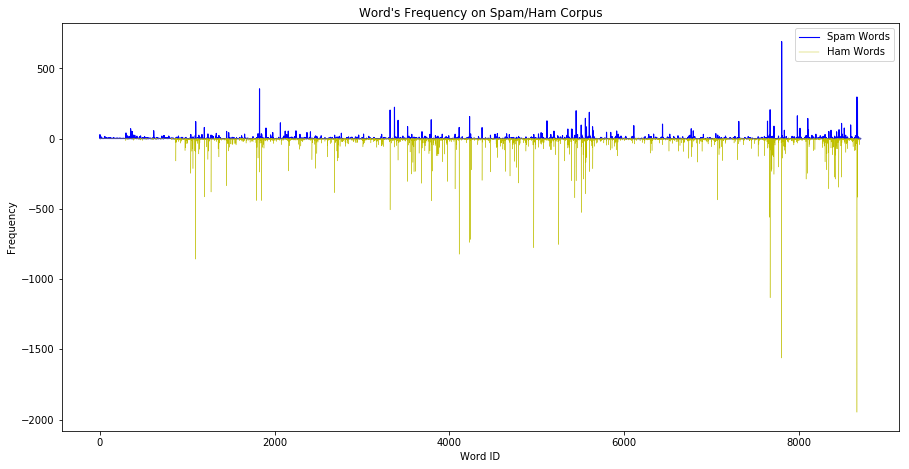

In [145]:
Ws = np.zeros(len(XX[0]))
Wh = np.zeros(len(XX[0]))
for i in np.arange(len(XX)):
    if Spam[i]==1:
        Ws+= XX[i]

for i in np.arange(len(XX)):
    if Spam[i]==0:
        Wh+= XX[i]

plt.figure(figsize=(15,7.5))
plt.title("Word's Frequency on Spam/Ham Corpus")
plt.xlabel("Word ID")
plt.ylabel("Frequency")
plt.plot(Ws,'-b',linewidth=1.1)
plt.plot(-Wh,'-y',linewidth=0.4)
plt.legend(["Spam Words","Ham Words"])
plt.show()

In [150]:
#total words in all the Corpus
Wt = np.sum(XX)

#len(XX.T) =  number of different words in Corpus (also considered as indexes) 
#Words identification for Spam messages 

n= 0
Bag = []
for i in np.arange(len(XX.T)):
    p= (Ws[i]-Wh[i])
    if p>20:
        Bag.append([Words[i],p])
    n+= 1
print("Bag Size:",len(Bag))
print(Bag)

Bag Size: 74
[['000', 29.0], ['100', 39.0], ['1000', 41.0], ['10p', 24.0], ['150p', 71.0], ['150ppm', 34.0], ['16', 52.0], ['18', 51.0], ['2000', 23.0], ['50', 52.0], ['500', 44.0], ['5000', 25.0], ['800', 22.0], ['8007', 21.0], ['apply', 28.0], ['award', 27.0], ['awarded', 38.0], ['bonus', 21.0], ['box', 28.0], ['call', 117.0], ['camera', 32.0], ['cash', 64.0], ['chat', 30.0], ['claim', 113.0], ['co', 52.0], ['code', 29.0], ['collection', 26.0], ['com', 37.0], ['contact', 44.0], ['cost', 21.0], ['cs', 44.0], ['customer', 40.0], ['draw', 34.0], ['entry', 26.0], ['free', 164.0], ['guaranteed', 50.0], ['http', 21.0], ['landline', 30.0], ['latest', 33.0], ['line', 27.0], ['mins', 24.0], ['mob', 25.0], ['mobile', 112.0], ['national', 22.0], ['network', 21.0], ['nokia', 64.0], ['orange', 23.0], ['our', 21.0], ['per', 34.0], ['po', 29.0], ['prize', 93.0], ['rate', 28.0], ['receive', 28.0], ['reply', 60.0], ['ringtone', 32.0], ['sae', 21.0], ['selected', 21.0], ['service', 52.0], ['shows', 26

### SVM Model Generation and Hyperparameter Optimization
As in previous incises, the results of both kernels, linear and rbf are the same. 

    - Best value of "C": 17
    - Time for hyperparameter optimization: c.a. 1 minute
    - Accuracy on test data: 97%

In [172]:
n= 0
Bag = []
P = []
for i in np.arange(len(XX.T)):
    p= (Ws[i]-Wh[i])
    if p>20:
        Bag.append(Words[i])
    n+= 1
    
vectorizer = CountVectorizer(vocabulary=Bag)
X2 = vectorizer.fit_transform(Text)
Words2 = np.array(vectorizer.get_feature_names())
Values2 = np.sum(X2.toarray(),axis=0)
XX2 = X2.toarray()

In [185]:
Xtr, Xtst, Ytr, Ytst = train_test_split(XX2, Spam, test_size=0.30)

svm_ = svm.SVC('linear')

C = np.arange(1,100,2).tolist()
parameters = {'C':C}

grid = GridSearchCV(svm_, parameters)
grid.fit(Xtr, Ytr)
results_ = pd.DataFrame(grid.cv_results_)
print("Best value: ",grid.best_estimator_.C)
print("Score: ",grid.best_score_)

Best value:  17
Score:  0.973333333333


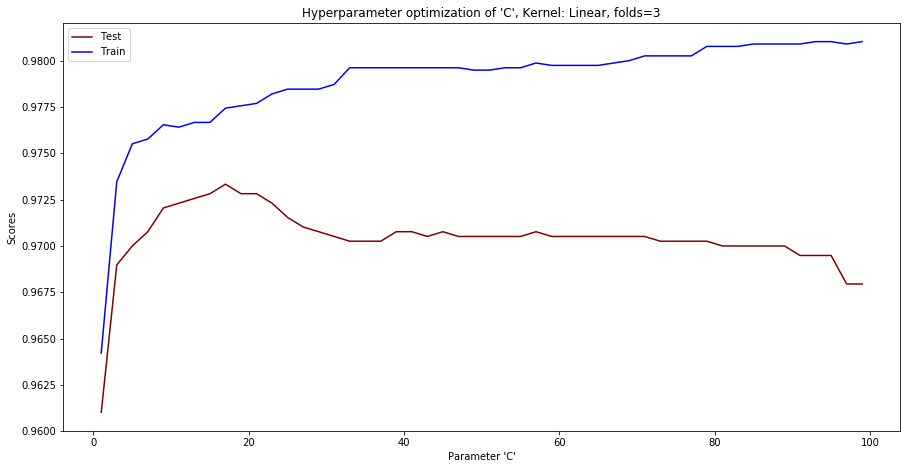

In [186]:
#Scores Bar Plot
plt.figure(figsize=(15,7.5))
plt.title("Hyperparameter optimization of 'C', Kernel: Linear, folds=3")
plt.xlabel("Parameter 'C'")
plt.ylabel("Scores")
plt.plot(C,results_.iloc[:,2], "maroon")
plt.plot(C,results_.iloc[:,3], "blue")
plt.legend(["Test","Train"])
plt.show()

In [189]:
results_.iloc[0:11:,2:7]

,mean_test_score,mean_train_score,param_C,params,rank_test_score
0,0.961026,0.964231,1,{'C': 1},50
1,0.968974,0.973462,3,{'C': 3},47
2,0.970000,0.975513,5,{'C': 5},38
3,0.970769,0.975770,7,{'C': 7},11
4,0.972051,0.976539,9,{'C': 9},8
5,0.972308,0.976411,11,{'C': 11},6
6,0.972564,0.976667,13,{'C': 13},5
7,0.972821,0.976667,15,{'C': 15},2
8,0.973333,0.977436,17,{'C': 17},1
9,0.972821,0.977565,19,{'C': 19},2


In [188]:
svm_ = svm.SVC(kernel='linear', C= 17)
svm_.fit(Xtr,Ytr)
svm_.score(Xtst,Ytst) 

0.97009569377990434

## Exercise 2: Compare SVM based spam filter with another model (4 Points)

#### Objetive 
Compare results obtained in one of the task above with another model of your choice (decision trees or logistic regression etc). 


- Optimize the hyperparameters and perform 5-fold cross validation. 
You can use scikit-learn implementation. 
- Compare the results and accuracy. 
- Conclude your findings.


### Logistic Regression (L2)

In [190]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xtr,Ytr)
clf.score(Xtst,Ytst)

0.96650717703349287

### Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier
TreeParam ={'max_depth': range(1,50,1)}
Tree_clf  = DecisionTreeClassifier()

#Grid Search 
#Hyperparameters: Split per leaf, and depth
Tree_grid = GridSearchCV(Tree_clf,TreeParam)
Tree_grid.fit(Xtr,Ytr)

Results = pd.DataFrame(Tree_grid.cv_results_)
print("Best Depth value: ",Tree_grid.best_estimator_.max_depth)
print("Score: ",Tree_grid.best_score_)

Best Depth value:  28
Score:  0.964871794872


In [221]:
Results.iloc[10:30:,2:8]

,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score
10,0.950000,0.972949,11,{'max_depth': 11},39,0.943121
11,0.951795,0.975641,12,{'max_depth': 12},38,0.948501
12,0.955641,0.977949,13,{'max_depth': 13},37,0.948501
13,0.958205,0.980000,14,{'max_depth': 14},36,0.949270
14,0.961026,0.981795,15,{'max_depth': 15},35,0.953882
15,0.962051,0.982692,16,{'max_depth': 16},32,0.955419
16,0.961538,0.983462,17,{'max_depth': 17},33,0.955419
17,0.963333,0.984359,18,{'max_depth': 18},19,0.959262
18,0.962564,0.985385,19,{'max_depth': 19},29,0.955419
19,0.964103,0.986026,20,{'max_depth': 20},8,0.957725


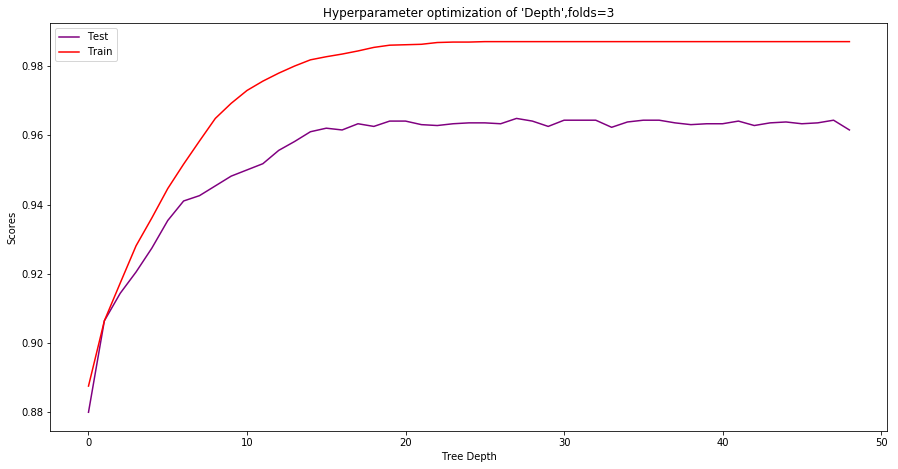

In [219]:
#Scores Bar Plot
plt.figure(figsize=(15,7.5))
plt.title("Hyperparameter optimization of 'Depth',folds=3")
plt.xlabel("Tree Depth")
plt.ylabel("Scores")
plt.plot(Results.iloc[:,2], "purple")
plt.plot(Results.iloc[:,3], "red")
plt.legend(["Test","Train"])
plt.show()

In [227]:
clfT = DecisionTreeClassifier(max_depth=17)
clfT.fit(Xtr,Ytr)
clfT.score(Xtst,Ytst)

0.96351674641148322

### Conclusion

- Diverse algorithms were learned in order to classify Ham/Spam documents.
- Pre-processsing of text data was implemented on SMS documents:
    - Extracting meaningful words for spam data represented a critical step; it reduced the calculation time in a factor about 300 and represented a slight improve (0.20%) in final score on Test Data
- Crossvalidation and paremeter tuning were performed on the algorithms bellow (highest to lowest score on test data):

        D3 Data Set:
            a) SVM (C= 5), Score: 84.79%
        
        D2 Data Set:
        
          No Word optimization
            a) SVM (C=47.5), Score: 96.88%
                Time Whole test= 12 hours
            
          After Word Optimization
            a) SVM (C = 17), Score: 97.00%
                T test = 2 mins
            b) Logistic Regression, Score: 96.65%
                T test = 0.23 secs
            c) Tree (Depth 17), Score: 96.35%
                T test = 2 mins
    
    - 